In [ ]:
! pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

import pandas as pd
pd.options.display.max_columns = None

import numpy as np
from numpy import empty

from sklearn import preprocessing

BASIC PIZZA PLOT

We will use mplsoccer’s FontManager to load some fonts from Google Fonts. We borrowed the FontManager from the excellent ridge_map library.

In [ ]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

Load a cropped image of Robert Lewandowski.

In [ ]:
URL_foto = "https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/lewa_cropped.png"
lewa_cropped = Image.open(urlopen(URL_foto))

https://crop-circle.imageonline.co/

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# Coge la foto que se ha subido
URL_foto_1 = "fm-modified.png"
foto = Image.open(URL_foto_1)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
URL_foto_2 = "logo.png"
escudo = Image.open(URL_foto_2)

Scrape the data via a link to a specific table. To get the link for a different league, find the table you want from the website. Then click “Share & more” and copy the link from the option “Modify & Share Table”. Then “click url for sharing” and get the table as a url.

Vamos a hacer scrapping de dos tablas distintas con estadísticas de porteros, que posteriormente uniremos (merge) para tener todas las variables de estudio en el mismo dataFrame.

URL1 = 'https://fbref.com/en/share/fSC8B'
URL2 = 'https://fbref.com/en/share/Xc1Ti'

In [ ]:
URL1 = 'https://fbref.com/en/share/fSC8B'
df = pd.read_html(URL1)[0]
# select a subset of the columns (Squad and touches columns)
#df = df[['Unnamed: 0_level_0', 'GK1']].copy()
df.columns = df.columns.droplevel()  # drop the top-level of the multi-index
df

,Player,Squad,GA,PSxG/SoT,PSxG+/-,Cmp%,Stp%,#OPA
0,Sergio Asenjo,Valladolid,7,0.47,-1.3,35.4,2.6,13
1,Édgar Badía,Elche,31,0.36,+6.2,48.9,3.7,3
2,Yassine Bounou,Sevilla,19,0.31,+2.9,30.6,6.5,23
3,Claudio Bravo,Betis,1,0.12,0.0,28.6,0.0,2
4,Juan Carlos,Girona,18,0.35,-1.3,35.9,5.0,21
5,Thibaut Courtois,Real Madrid,12,0.18,-2.7,41.4,12.1,9
6,Stole Dimitrievski,Rayo Vallecano,13,0.36,+4.4,27.2,1.7,18
7,Marko Dmitrović,Sevilla,3,0.20,-0.4,37.5,17.1,3
8,Aitor Fernández,Osasuna,3,0.26,+0.4,48.7,4.2,8
9,Álvaro Fernández,Espanyol,7,0.37,+0.4,53.8,3.8,7


In [ ]:
URL2 = 'https://fbref.com/en/share/Xc1Ti'
df2 = pd.read_html(URL2)[0]
df2.columns = df2.columns.droplevel()  # drop the top-level of the multi-index
df2

,Player,Squad,Save%,CS%
0,Sergio Asenjo,Valladolid,41.7,20.0
1,Édgar Badía,Elche,69.6,0.0
2,Yassine Bounou,Sevilla,70.7,8.3
3,Claudio Bravo,Betis,87.5,50.0
4,Juan Carlos,Girona,62.8,0.0
5,Thibaut Courtois,Real Madrid,76.3,0.0
6,Stole Dimitrievski,Rayo Vallecano,72.7,38.5
7,Marko Dmitrović,Sevilla,78.6,0.0
8,Aitor Fernández,Osasuna,76.9,50.0
9,Álvaro Fernández,Espanyol,65.0,25.0


Con la instrucción merge lo que se pretende es unir los datos que hay en ambos df. A la instrucción merge se le pasan por parámetro el df que queremos unir, y las columnas que queremos que sean el nexo de unión entre ambos df.

In [ ]:
fullData_porteros = df.merge(df2, left_on='Player', right_on='Player')
fullData_porteros["Player + Club"] = fullData_porteros["Player"] + ", " + fullData_porteros["Squad_x"]
fullData_porteros = fullData_porteros[['Player + Club','GA','PSxG/SoT','PSxG+/-','Cmp%','Stp%','#OPA','Save%','CS%']]
fullData_porteros = fullData_porteros.drop(fullData_porteros[fullData_porteros['Player + Club']=='Player, Squad'].index)
df_porteros = fullData_porteros.set_index('Player + Club')
df_porteros.rename(columns={'GA': 'Goles encajados', 
                           'PSxG/SoT': 'PSxG/TaP',
                            'PSxG+/-': 'PSxG - Goles encajados',
                            'Cmp%': 'Saques de puerta completados',
                            'Stp%': 'Centros detenidos',
                            '#OPA': 'Acciones defensivas fuera del área',
                            'Save%': 'Paradas',
                           'CS%': 'Poterías a 0'}, inplace=True)
df_porteros

,Goles encajados,PSxG/TaP,PSxG - Goles encajados,Saques de puerta completados,Centros detenidos,Acciones defensivas fuera del área,Paradas,Poterías a 0
Player + Club,,,,,,,,
"Sergio Asenjo, Valladolid",7,0.47,-1.3,35.4,2.6,13,41.7,20.0
"Édgar Badía, Elche",31,0.36,+6.2,48.9,3.7,3,69.6,0.0
"Yassine Bounou, Sevilla",19,0.31,+2.9,30.6,6.5,23,70.7,8.3
"Claudio Bravo, Betis",1,0.12,0.0,28.6,0.0,2,87.5,50.0
"Juan Carlos, Girona",18,0.35,-1.3,35.9,5.0,21,62.8,0.0
"Thibaut Courtois, Real Madrid",12,0.18,-2.7,41.4,12.1,9,76.3,0.0
"Stole Dimitrievski, Rayo Vallecano",13,0.36,+4.4,27.2,1.7,18,72.7,38.5
"Marko Dmitrović, Sevilla",3,0.20,-0.4,37.5,17.1,3,78.6,0.0
"Aitor Fernández, Osasuna",3,0.26,+0.4,48.7,4.2,8,76.9,50.0


In [ ]:
nombres = pd.DataFrame(fullData_porteros['Player + Club'])
nombres.index = range(nombres.shape[0])
nombres = nombres.reset_index()
nombres

,index,Player + Club
0,0,"Sergio Asenjo, Valladolid"
1,1,"Édgar Badía, Elche"
2,2,"Yassine Bounou, Sevilla"
3,3,"Claudio Bravo, Betis"
4,4,"Juan Carlos, Girona"
5,5,"Thibaut Courtois, Real Madrid"
6,6,"Stole Dimitrievski, Rayo Vallecano"
7,7,"Marko Dmitrović, Sevilla"
8,8,"Aitor Fernández, Osasuna"
9,9,"Álvaro Fernández, Espanyol"


Hay que normalizar los datos.

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
names = df_porteros.columns
d = scaler.fit_transform(df_porteros)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df = scaled_df.reset_index()
scaled_df = scaled_df.round(0)
scaled_df

,index,GA,PSxG/SoT,PSxG+/-,Cmp%,Stp%,#OPA,Save%,CS%
0,0,20.0,100.0,43.0,36.0,15.0,52.0,26.0,25.0
1,1,100.0,69.0,100.0,71.0,22.0,12.0,70.0,0.0
2,2,60.0,54.0,75.0,23.0,38.0,92.0,72.0,11.0
3,3,0.0,0.0,53.0,18.0,0.0,8.0,98.0,64.0
4,4,57.0,66.0,43.0,37.0,29.0,84.0,59.0,0.0
5,5,37.0,17.0,33.0,51.0,71.0,36.0,80.0,0.0
6,6,40.0,69.0,86.0,14.0,10.0,72.0,75.0,49.0
7,7,7.0,23.0,50.0,41.0,100.0,12.0,84.0,0.0
8,8,7.0,40.0,56.0,70.0,25.0,32.0,81.0,64.0
9,9,20.0,71.0,56.0,84.0,22.0,28.0,63.0,32.0


In [ ]:
fullData = nombres.merge(scaled_df, left_on='index', right_on='index')
fullData = fullData[['Player + Club','GA','PSxG/SoT','PSxG+/-','Cmp%','Stp%','#OPA','Save%','CS%']]
fullData

,Player + Club,GA,PSxG/SoT,PSxG+/-,Cmp%,Stp%,#OPA,Save%,CS%
0,"Sergio Asenjo, Valladolid",20.0,100.0,43.0,36.0,15.0,52.0,26.0,25.0
1,"Édgar Badía, Elche",100.0,69.0,100.0,71.0,22.0,12.0,70.0,0.0
2,"Yassine Bounou, Sevilla",60.0,54.0,75.0,23.0,38.0,92.0,72.0,11.0
3,"Claudio Bravo, Betis",0.0,0.0,53.0,18.0,0.0,8.0,98.0,64.0
4,"Juan Carlos, Girona",57.0,66.0,43.0,37.0,29.0,84.0,59.0,0.0
5,"Thibaut Courtois, Real Madrid",37.0,17.0,33.0,51.0,71.0,36.0,80.0,0.0
6,"Stole Dimitrievski, Rayo Vallecano",40.0,69.0,86.0,14.0,10.0,72.0,75.0,49.0
7,"Marko Dmitrović, Sevilla",7.0,23.0,50.0,41.0,100.0,12.0,84.0,0.0
8,"Aitor Fernández, Osasuna",7.0,40.0,56.0,70.0,25.0,32.0,81.0,64.0
9,"Álvaro Fernández, Espanyol",20.0,71.0,56.0,84.0,22.0,28.0,63.0,32.0


To plot we need a parameter list and corresponding values list. 

In [ ]:
# parameter list
#params = [ "Non-Penalty Goals", "npxG", "npxG per Shot", "xA", "Open Play\nShot Creating Actions", "\nPenalty Area\nEntries", "Progressive Passes", "Progressive Carries", "Successful Dribbles", "\nTouches\nper Turnover", "pAdj\nPress Regains", "Aerials Won" ]
params = df_porteros.columns.array
params

<PandasArray>
[                   'Goles encajados',                           'PSxG/TaP',
             'PSxG - Goles encajados',       'Saques de puerta completados',
                  'Centros detenidos', 'Acciones defensivas fuera del área',
                            'Paradas',                       'Poterías a 0']
Length: 8, dtype: object

In [ ]:
# values for corresponding parameters
# The values are taken from the excellent fbref website (supplied by StatsBomb)
# values = [99, 99, 87, 51, 62, 58, 45, 40, 27, 74, 77, 73]
values = [63.0,	40.0,	58.0,	23.0,	33.0,	48.0,	78.0,	10.0]
values

[63.0, 40.0, 58.0, 23.0, 33.0, 48.0, 78.0, 10.0]

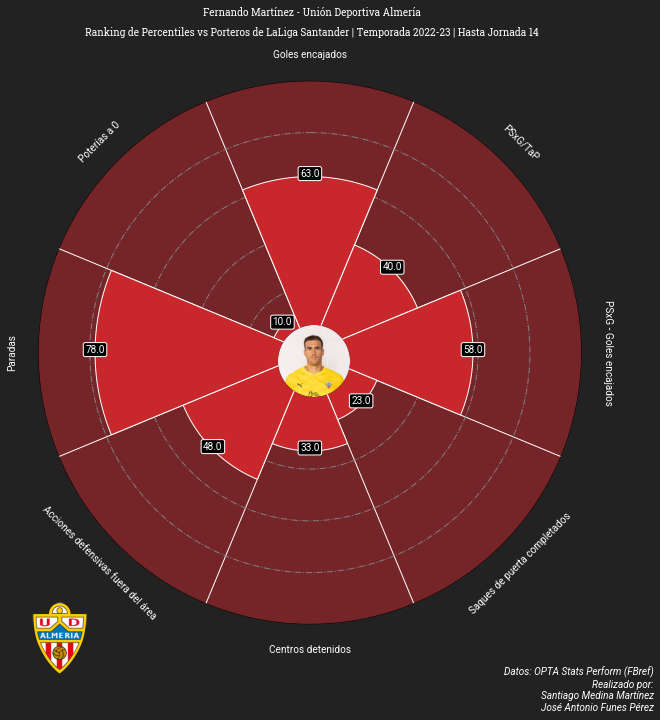

In [ ]:
# instantiate PyPizza class
baker = PyPizza(
    background_color="#222222",
    params=params,                  # list of parameters
    straight_line_color="#ffffff",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#c8282c", edgecolor="#ffffff",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#ffffff", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#ffffff", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#ffffff", facecolor="#000000",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Fernando Martínez - Unión Deportiva Almería", size=20,
    ha="center", fontproperties=font_bold.prop, color="#ffffff"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Ranking de Percentiles vs Porteros de LaLiga Santander | Temporada 2022-23 | Hasta Jornada 14",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#ffffff"
)

# add credits
CREDIT_1 = "Datos: OPTA Stats Perform (FBref)"
CREDIT_2 = "Realizado por:\nSantiago Medina Martínez\nJosé Antonio Funes Pérez"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#ffffff",
    ha="right"
)

# add image
ax_image = add_image(
    foto, fig, left=0.4678, bottom=0.4415, width=0.1, height=0.1 #left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

ax_image = add_image(
    escudo, fig, left=0.1, bottom=0.04, width=0.13, height=0.13
) 

plt.show()